<a href="https://colab.research.google.com/github/Ibrahimsyah/PaperRockScissor/blob/master/ML_Beginner_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
   -O /tmp/rockpaperscissors.zip

--2021-06-25 00:14:59--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  13.6MB/s    in 18s     

2021-06-25 00:15:17 (17.5 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [2]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

BASE_DIR = "/tmp/rockpaperscissors/rps-cv-images"
datagen = ImageDataGenerator(
                    validation_split=0.3,
                    rescale=1./255,
                    rotation_range=20,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
train_generator = datagen.flow_from_directory(
    BASE_DIR, 
    subset='training',
    target_size=(150, 100),
    batch_size=4,
    class_mode='categorical'
)
val_generator = datagen.flow_from_directory(
    BASE_DIR, 
    subset='validation',
    target_size=(150, 100),
    batch_size=4,
    class_mode='categorical'
)
test_generator = datagen.flow_from_directory(
    BASE_DIR, 
    target_size=(150, 100),
    batch_size=4,
    class_mode='categorical'
)

Found 1533 images belonging to 3 classes.
Found 655 images belonging to 3 classes.
Found 2188 images belonging to 3 classes.


In [40]:
from keras import callbacks

model = tf.keras.models.Sequential([
     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 100, 3)),
     tf.keras.layers.MaxPooling2D(2, 2),
     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(512, activation='relu'),
     tf.keras.layers.Dense(3, activation='softmax')
 ])
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

earlyStopCb = callbacks.EarlyStopping(
    monitor="accuracy", 
    mode="max",
    patience=3,
    restore_best_weights=True
) 
result = model.fit(
       train_generator,
       steps_per_epoch=20,
       epochs=50,
       validation_data=val_generator,
       validation_steps=5,
       verbose=1,
       callbacks=[earlyStopCb]
       )

Epoch 1/50
20/20 [==============================] - 4s 187ms/step - loss: 1.1253 - accuracy: 0.3000 - val_loss: 1.0919 - val_accuracy: 0.4500
Epoch 2/50
20/20 [==============================] - 4s 176ms/step - loss: 1.0970 - accuracy: 0.3250 - val_loss: 1.0787 - val_accuracy: 0.4000
Epoch 3/50
20/20 [==============================] - 4s 176ms/step - loss: 1.1033 - accuracy: 0.3250 - val_loss: 1.0798 - val_accuracy: 0.4500
Epoch 4/50
20/20 [==============================] - 4s 177ms/step - loss: 1.0413 - accuracy: 0.5375 - val_loss: 0.8960 - val_accuracy: 0.7000
Epoch 5/50
20/20 [==============================] - 4s 179ms/step - loss: 0.9334 - accuracy: 0.6125 - val_loss: 0.3922 - val_accuracy: 0.9500
Epoch 6/50
20/20 [==============================] - 4s 176ms/step - loss: 0.9141 - accuracy: 0.5500 - val_loss: 0.8289 - val_accuracy: 0.8000
Epoch 7/50
20/20 [==============================] - 4s 176ms/step - loss: 0.6548 - accuracy: 0.7250 - val_loss: 0.5276 - val_accuracy: 0.8500
Epoch 

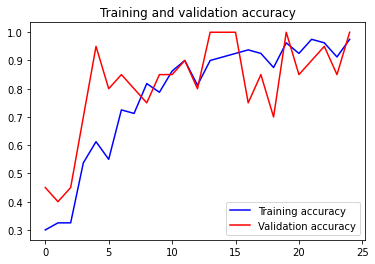

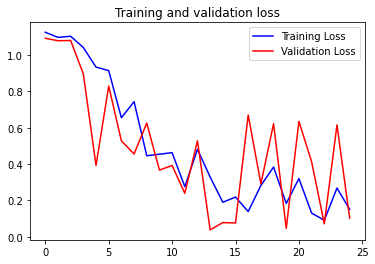

In [41]:
import matplotlib.pyplot as plt
acc = result.history['accuracy']
val_acc = result.history['val_accuracy']
loss = result.history['loss']
val_loss = result.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [42]:
scores = model.evaluate(val_generator)
scores = model.evaluate(test_generator)

547/547 [==============================] - 31s 56ms/step - loss: 0.1708 - accuracy: 0.9388
